# **Tugas Prakikum Mandiri 4**

# Import Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Menghubungkan dengan Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Praktikum04"

# Membaca Dataset

In [9]:
df = pd.read_csv(path + '/Data/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [11]:
df.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


# Menentukan Fitur (X) dan Target (Y)

In [12]:
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

print("X shape:", X.shape)
print("y shape:", y.shape)

print("\nFitur X:\n", X.head())
print("\nTarget y:\n", y.head())

X shape: (1000, 5)
y shape: (1000,)

Fitur X:
    Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan
0    32       1        0               0          240
1    49       2        1               1          100
2    52       1        0               2          250
3    26       2        1               1          130
4    45       3        0               2          237

Target y:
 0    1
1    0
2    1
3    0
4    1
Name: Beli_Mobil, dtype: int64


# Membagi Data Training dan Testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 800
Jumlah data testing: 200


# Standarisasi Data

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Contoh hasil scaling (5 baris pertama):\n", X_train_scaled[:5])

Contoh hasil scaling (5 baris pertama):
 [[-0.66817214  0.49292515 -0.95118973 -1.17520165  0.13241301]
 [-1.20516468 -0.4459799   1.05131497 -1.17520165 -1.43528969]
 [-1.43530434 -0.4459799  -0.95118973  1.33524246  0.9320466 ]
 [ 0.40581293 -0.4459799   1.05131497  0.08002041  1.50020731]
 [-1.20516468 -0.4459799  -0.95118973  1.33524246  1.9105456 ]]


# Membangun dan Melatih Model

In [15]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

print("Model logistic regression berhasil dilatih.")

Model logistic regression berhasil dilatih.


# Melakukan Prediksi

In [16]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

print("Hasil prediksi (label):\n", y_pred[:10])
print("Hasil prediksi (probabilitas):\n", y_proba[:10])

Hasil prediksi (label):
 [1 1 0 1 1 1 0 0 1 0]
Hasil prediksi (probabilitas):
 [[1.08467987e-03 9.98915320e-01]
 [8.29487425e-05 9.99917051e-01]
 [9.82800070e-01 1.71999297e-02]
 [7.95907910e-02 9.20409209e-01]
 [5.06735445e-05 9.99949326e-01]
 [7.84230659e-04 9.99215769e-01]
 [7.34925174e-01 2.65074826e-01]
 [9.68604674e-01 3.13953255e-02]
 [4.60512621e-03 9.95394874e-01]
 [5.66230078e-01 4.33769922e-01]]


# Evaluasi Model

Accuracy: 0.91
Precision: 0.9609375
Recall: 0.9044117647058824
F1 Score: 0.9318181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        64
           1       0.96      0.90      0.93       136

    accuracy                           0.91       200
   macro avg       0.89      0.91      0.90       200
weighted avg       0.92      0.91      0.91       200



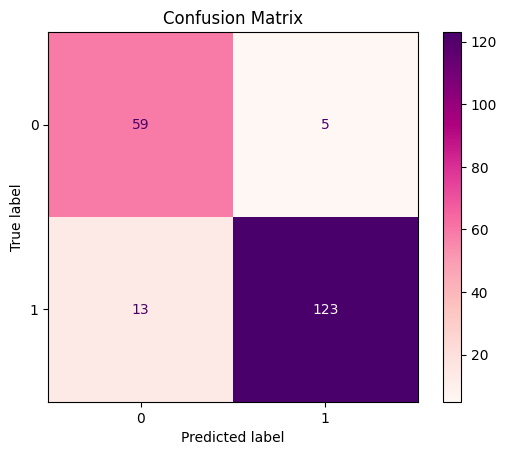

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='RdPu')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi Confusion Matrix & ROC Curve

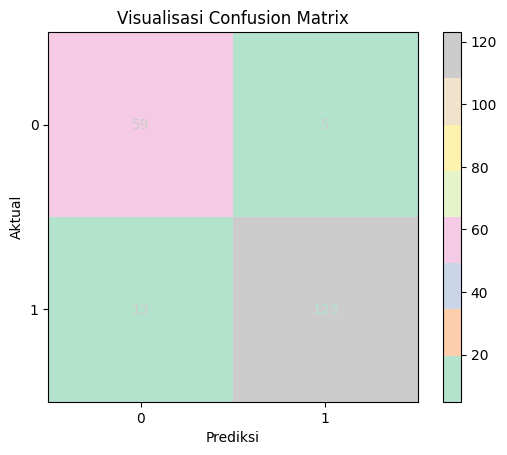

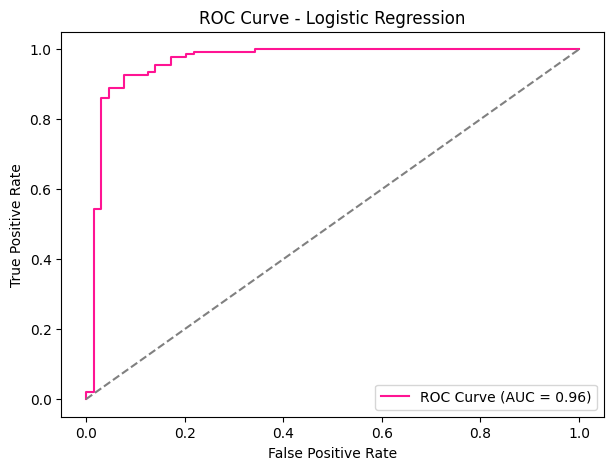

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Pastel2')
plt.title('Visualisasi Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# ROC Curve
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='deeppink', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Prediksi Data Baru

In [19]:
import pandas as pd

data_baru = pd.DataFrame([[35, 1, 0, 0, 250]],
                         columns=['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan'])

data_baru_scaled = scaler.transform(data_baru)
prediksi_baru = model.predict(data_baru_scaled)
probabilitas_baru = model.predict_proba(data_baru_scaled)

print("Probabilitas:", probabilitas_baru)
print("Prediksi beli mobil:", prediksi_baru)

Probabilitas: [[0.1670795 0.8329205]]
Prediksi beli mobil: [1]
